<a href="https://colab.research.google.com/github/msk1097/ML-Beginners/blob/master/ipl_a_complete_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv


In [0]:
import io 
deliveries = pd.read_csv(io.BytesIO(uploaded['deliveries.csv']))

In [5]:
uploaded = files.upload()

Saving matches.csv to matches.csv


In [0]:
matches = pd.read_csv(io.BytesIO(uploaded['matches.csv']))

In [19]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [0]:
matches['city']=matches['city'].astype('category')

In [23]:
matches.city.unique()

[Hyderabad, Pune, Rajkot, Indore, Bangalore, ..., Abu Dhabi, Sharjah, NaN, Mohali, Bengaluru]
Length: 33
Categories (32, object): [Hyderabad, Pune, Rajkot, Indore, ..., Abu Dhabi, Sharjah, Mohali, Bengaluru]

In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null category
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: category(1), int64(5), object(12)
memory usage: 102.8+ KB


In [25]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


#Total no. of wins by each team


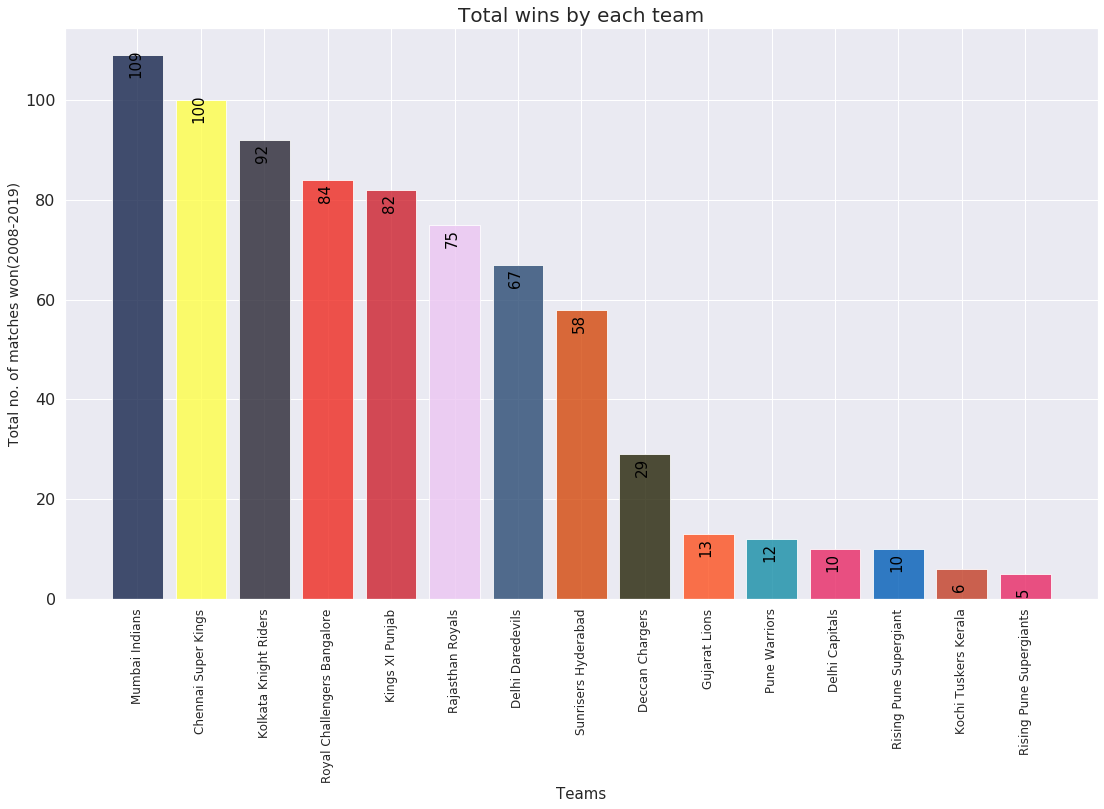

In [8]:
import seaborn as sns
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(matches['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

#Top 20 players with most MOM awards

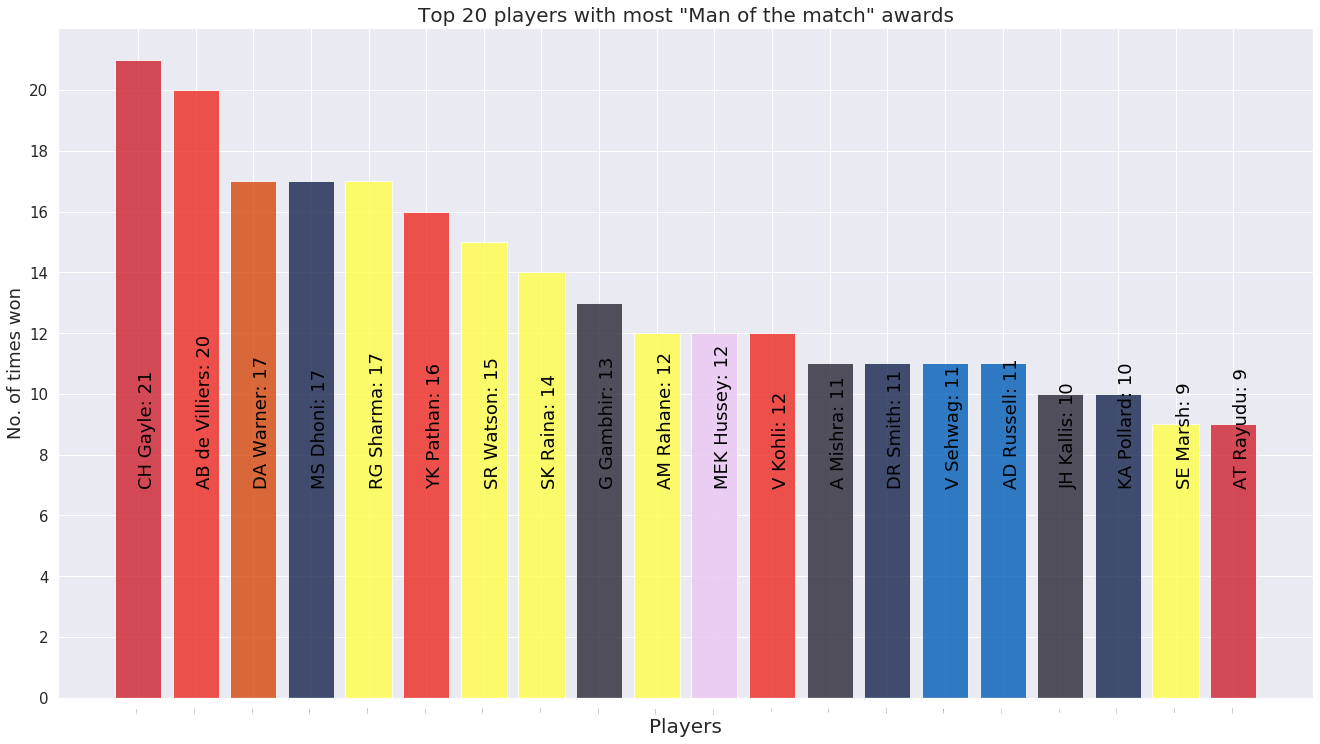

In [9]:
players=pd.DataFrame(matches['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

#Eliminating redundancy


* There were two entries for the same city as 'Bangalore' and 'Bengaluru'


In [0]:
matches.at[matches['city']=='Bengaluru','city']='Bangalore'

In [33]:
matches.city.unique()

[Hyderabad, Pune, Rajkot, Indore, Bangalore, ..., Ranchi, Abu Dhabi, Sharjah, NaN, Mohali]
Length: 32
Categories (31, object): [Hyderabad, Pune, Rajkot, Indore, ..., Ranchi, Abu Dhabi, Sharjah, Mohali]

#Matches hosted in each city


* Mumbai has hosted most no. of matches by far(101).
* As expected, top 8 cities are home grounds for the teams.

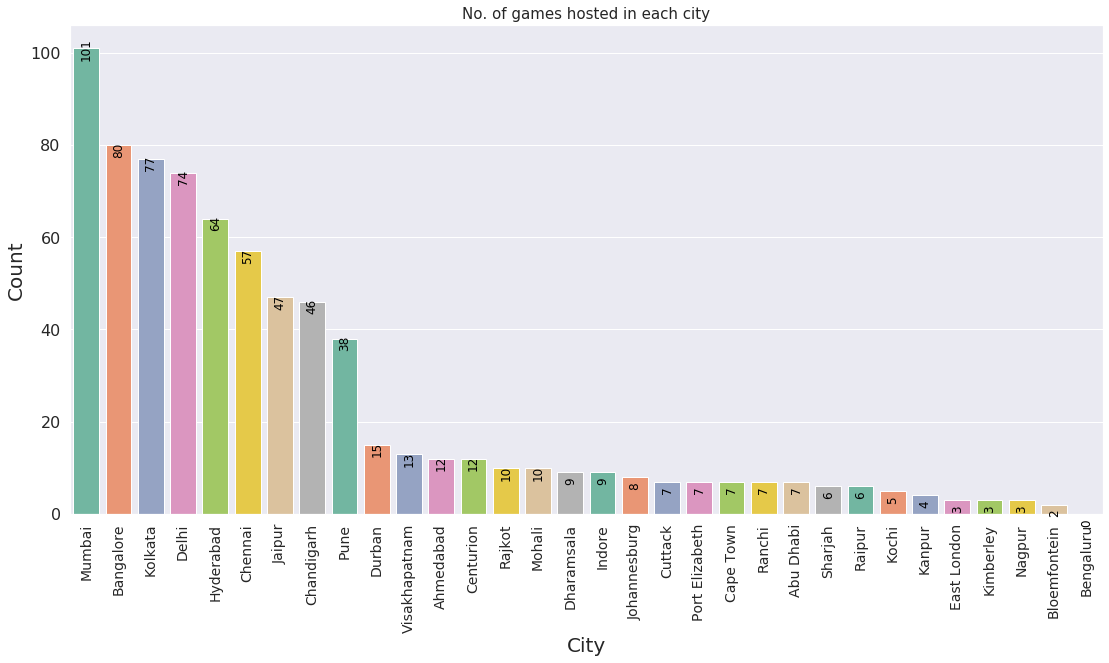

In [34]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(matches['city'],order=matches['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(matches['city'].value_counts())
cities['name']=matches['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

#No. of matches hosted at each stadium


* Eden Gardens(Kolkata) has hosted most no. of IPL matches(77)
* Wankhede and Chinnaswamy tied at no. 2 with 73 matches each.

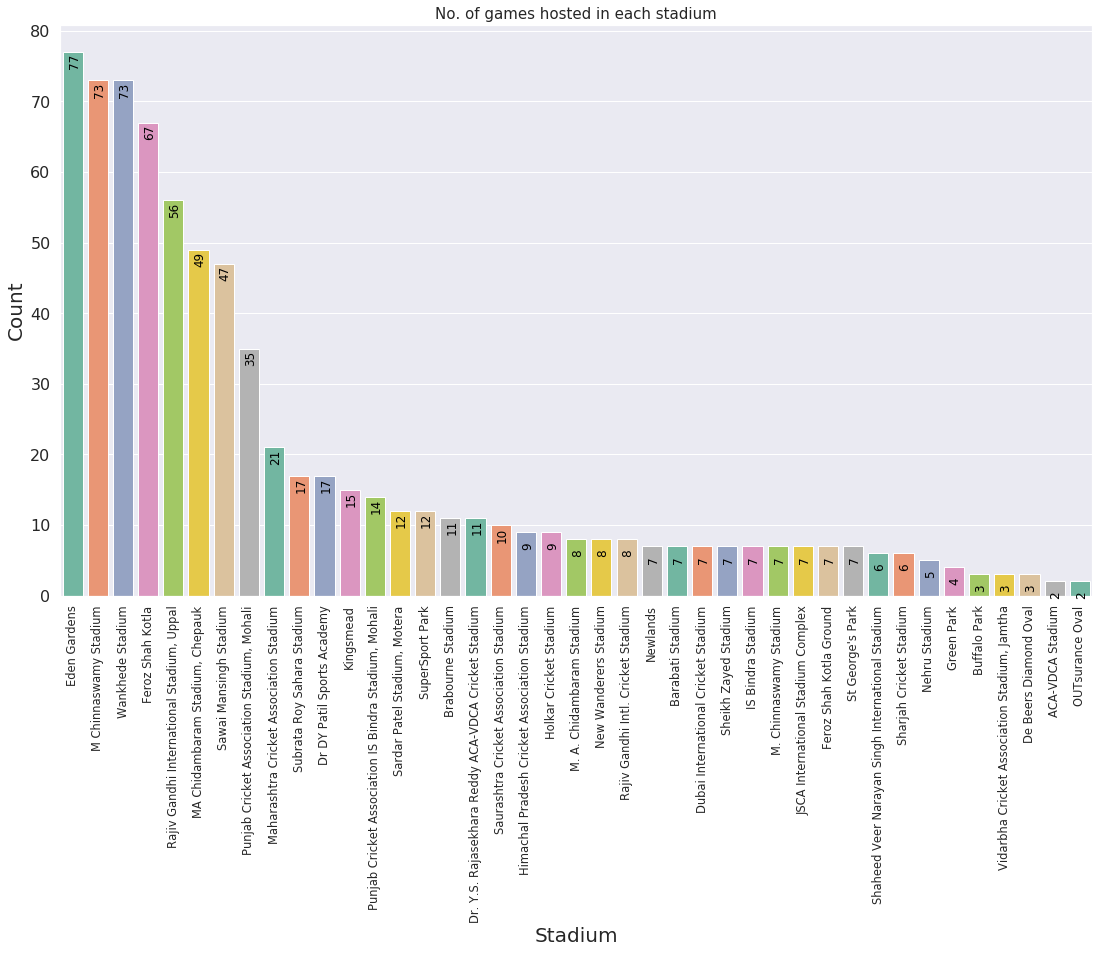

In [35]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(matches['venue'],order=matches['venue'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(matches['venue'].value_counts())
venues['name']=matches['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

#MI vs CSK head to head


In [0]:
micsk=matches[np.logical_or(np.logical_and(matches['team1']=='Mumbai Indians',
                                        matches['team2']=='Chennai Super Kings'),
                         np.logical_and(matches['team2']=='Mumbai Indians',
                                        matches['team1']=='Chennai Super Kings'))]

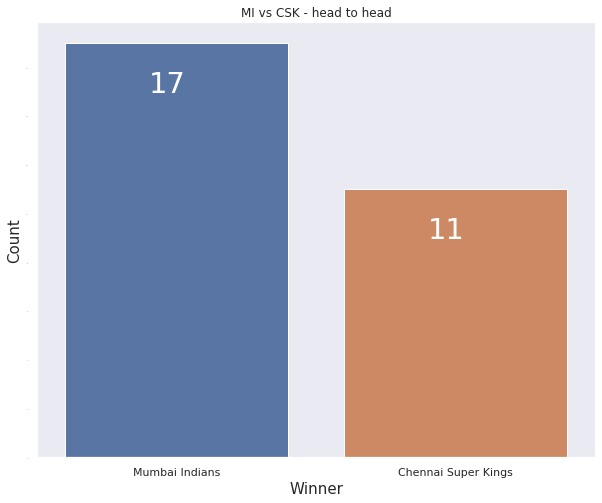

In [38]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index)
plt.text(-0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI vs CSK - head to head')
plt.show()

#MI vs CSK - Best performers


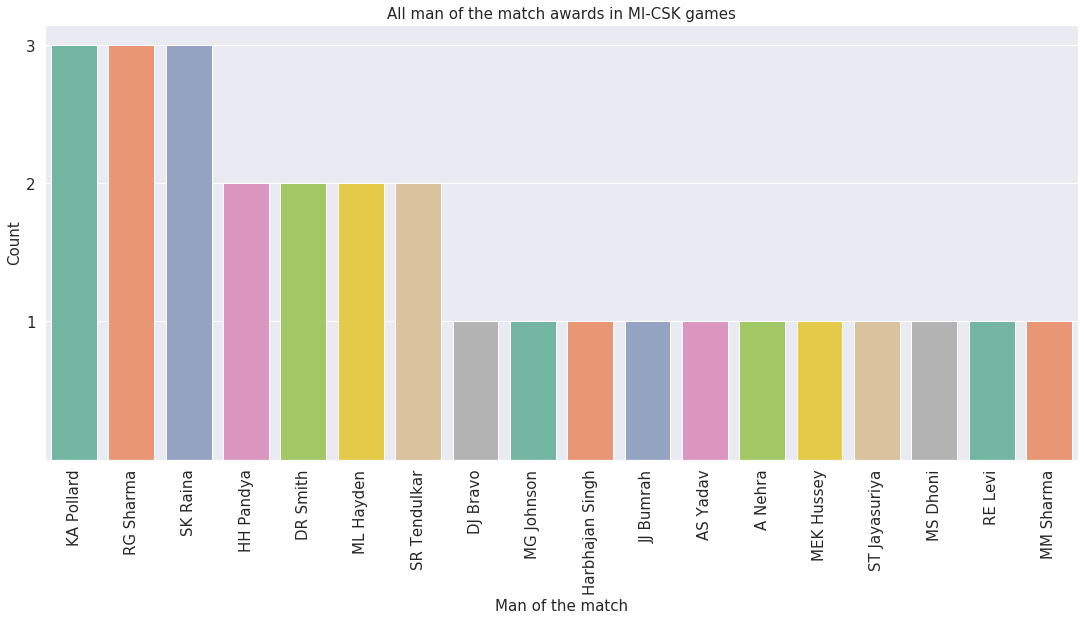

In [39]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['player_of_match'],order=micsk['player_of_match'].value_counts().index,palette='Set2')
plt.title('All man of the match awards in MI-CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

#Toss decision statistics for all MIvCSK matches - Venue wise


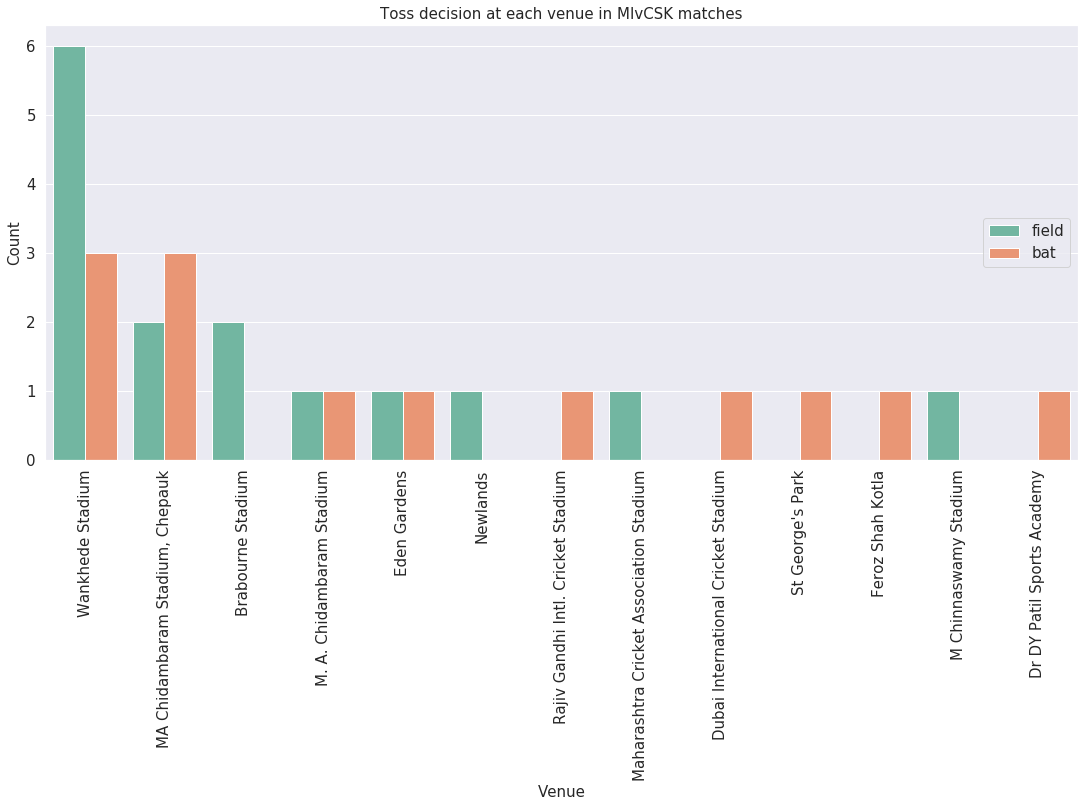

In [41]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'],order=micsk['venue'].value_counts().index,palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision at each venue in MIvCSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

#Decision upon winning the toss by both teams


* MI tends to bat first(53% of the times)
* CSK tends to bowl first(62% of the times)

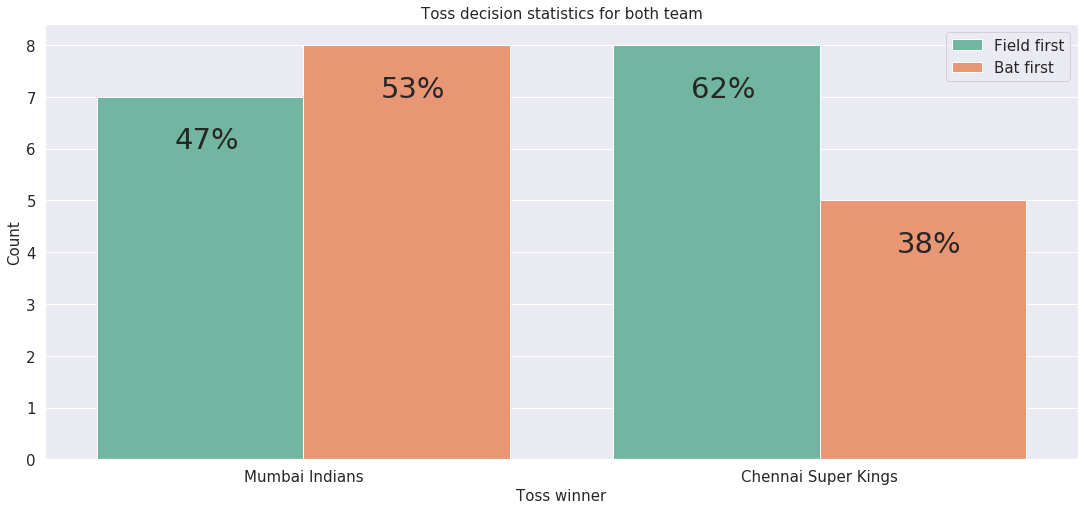

In [42]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()

# Season wise match summary of matches won by runs


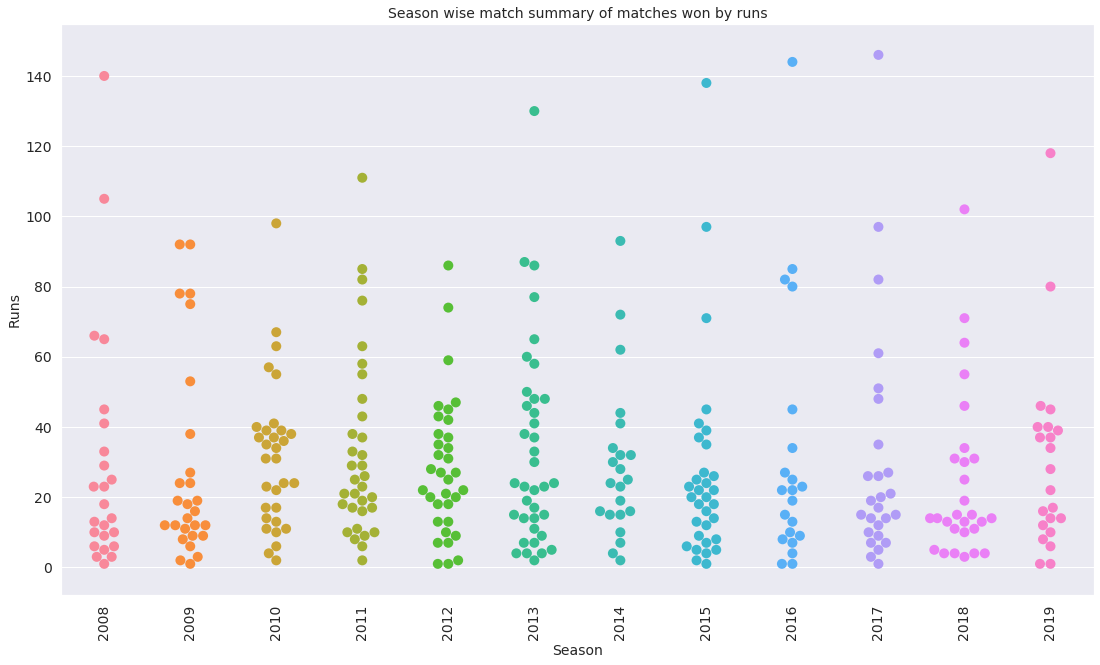

In [43]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(matches['season'],matches[matches['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

#Biggest win by runs each season


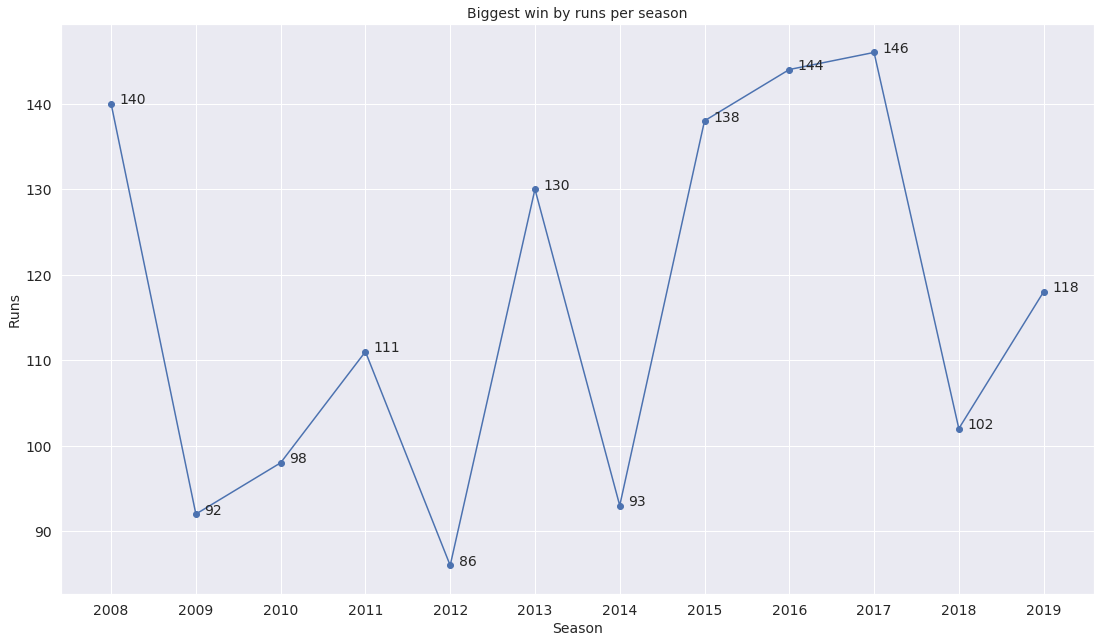

In [44]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(matches[matches['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

#Decision upon winning the toss teams

In [90]:
field = matches['toss_decision'].value_counts()['field']
bat = matches['toss_decision'].value_counts()['bat']
field_per = round(field/(field+bat)*100,0)
bat_per = round(bat/(field+bat)*100,0)
print (field, bat, field_per, bat_per)

463 293 61.0 39.0


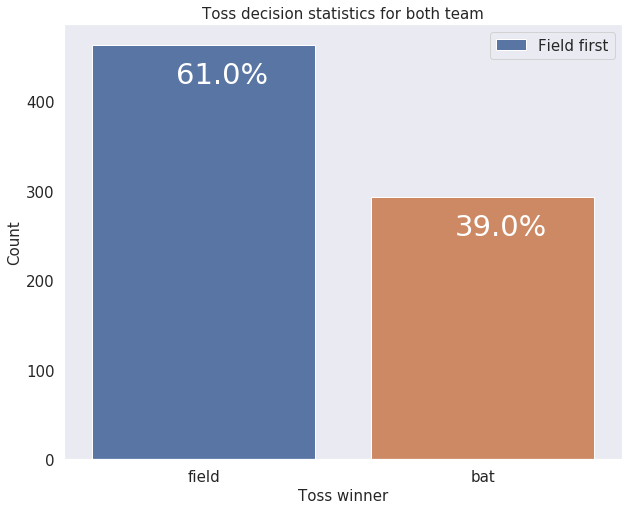

In [91]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(matches['toss_decision'],order=matches['toss_decision'].value_counts().index)
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.text(-0.1,420,str(field_per)+'%',size=29,color='white')
plt.text(0.9,250,str(bat_per)+'%',size=29,color='white')
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()

#Win-Loss for CSK

In [0]:
csk=matches[np.logical_or(matches['team2']=='Chennai Super Kings', matches['team1']=='Chennai Super Kings')]

In [117]:
csk.shape

(164, 18)

In [0]:
csk_win = csk.loc[csk.winner =='Chennai Super Kings', 'winner'].count()
csk_loose = csk.loc[csk.winner !='Chennai Super Kings', 'winner'].count()